In [26]:
import pandas as pd

# Read CSV into DataFrame
df = pd.read_csv('workouts.csv')


# Calculate volume (weight_kg x reps)
df['best_set_volume'] = df['weight_kg'] * df['reps']
df['total_volume'] = df['weight_kg'] * df['reps']
df['1rm'] = df['weight_kg'] * (1 + (df['reps'] / 30))

# Make new DF where the exercises are grouped by date, we keep the best 1RM and best volume and we sum the total volume for each exercise
grouped_data = df.groupby(['start_time','exercise_title']).agg({'1rm': 'max', 'best_set_volume': 'max', 'total_volume': 'sum', 'weight_kg': 'max', 'reps': 'sum'}).reset_index()
grouped_data = grouped_data.rename(columns={'weight_kg' : 'heaviest_weight', 'reps' : 'total_reps'})

# Convert start_time to datetime
grouped_data['start_time'] = pd.to_datetime(grouped_data['start_time'], format='%d %b %Y, %H:%M')

grouped_data = grouped_data.sort_values(by='start_time')

display(grouped_data)


,start_time,exercise_title,1rm,best_set_volume,total_volume,heaviest_weight,total_reps
350,2022-07-19 12:39:00,Bench Press (Barbell),73.333333,550.0,1940.0,55.0,41.0
351,2022-07-19 12:39:00,Crunch (Machine),69.666667,440.0,440.0,55.0,8.0
352,2022-07-19 12:39:00,Hammer Curl (Dumbbell),14.800000,100.0,264.0,12.0,25.0
353,2022-07-19 12:39:00,Incline Bench Press (Dumbbell),20.800000,144.0,396.0,16.0,26.0
354,2022-07-19 12:39:00,Lateral Raise (Dumbbell),7.800000,54.0,138.0,6.0,26.0
...,...,...,...,...,...,...,...
304,2024-01-17 14:22:00,Leg Raise Parallel Bars,NaN,NaN,0.0,NaN,23.0
303,2024-01-17 14:22:00,Lateral Raise (Machine),68.083333,617.5,1782.5,50.0,38.0
300,2024-01-17 14:22:00,Chest Press (Machine),104.000000,750.0,2400.0,80.0,34.0
302,2024-01-17 14:22:00,Incline Chest Press (Machine),82.000000,660.0,1695.0,60.0,29.0


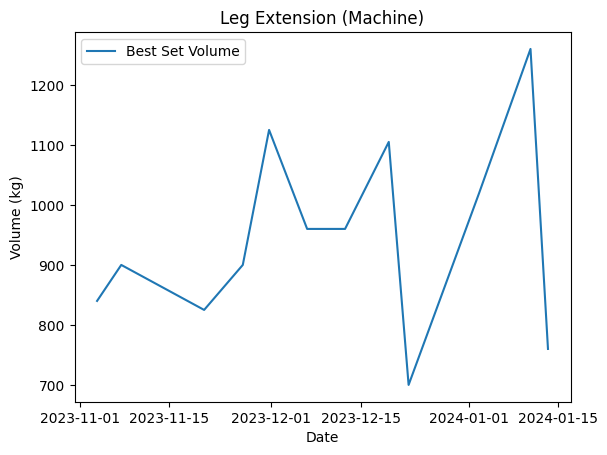

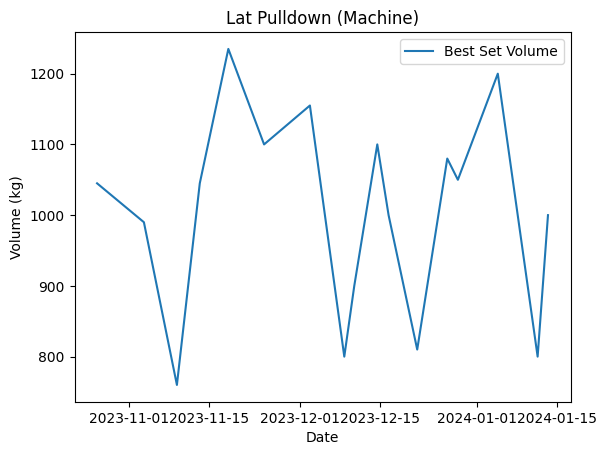

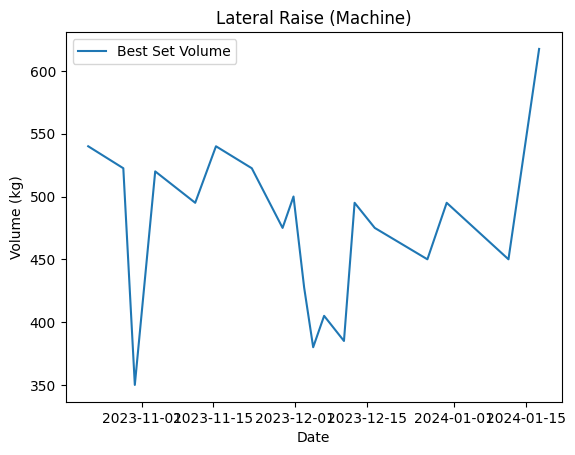

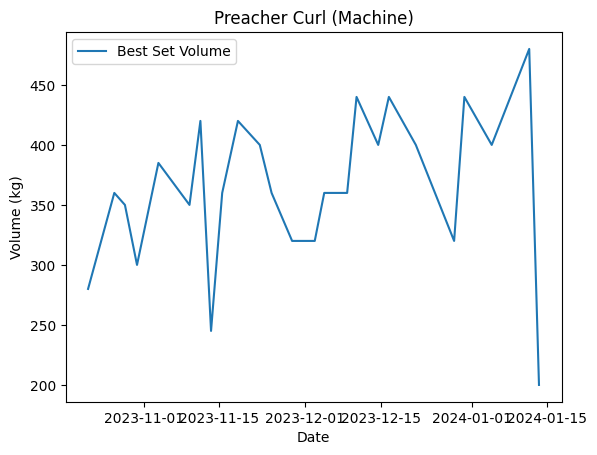

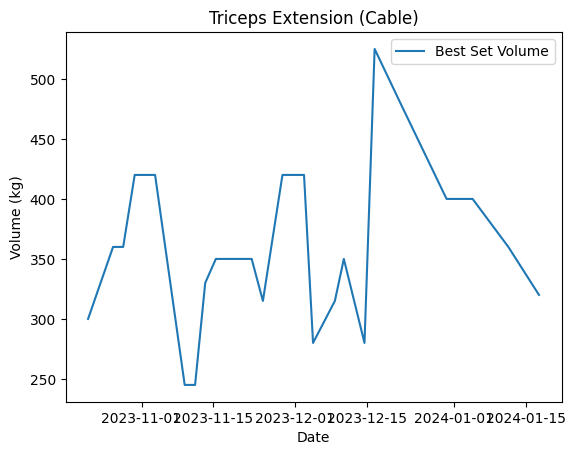

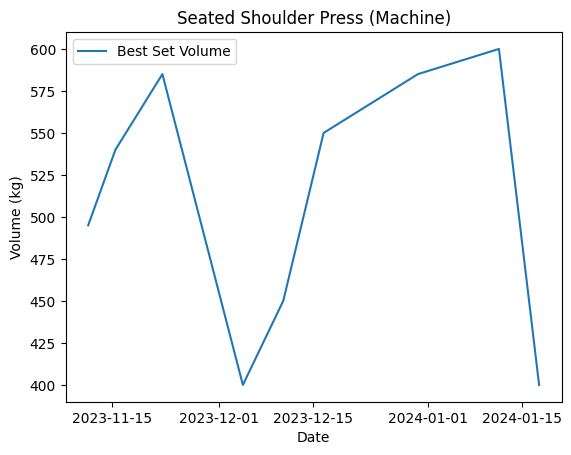

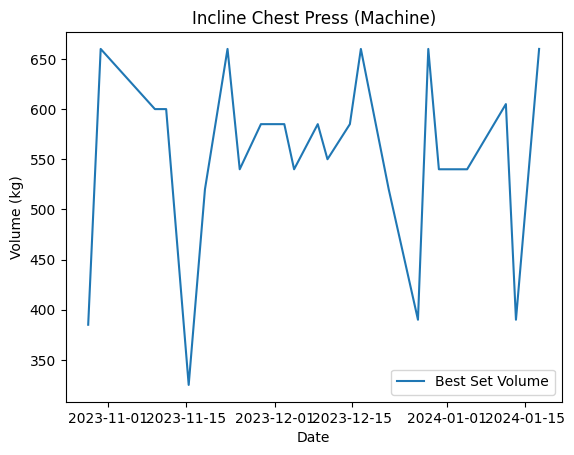

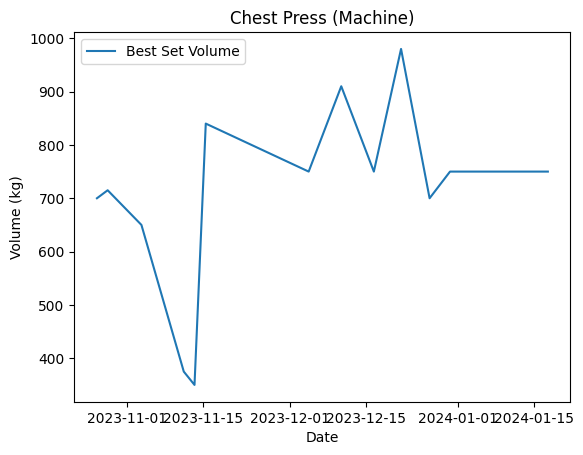

In [27]:
# Create a separate graph for each exercise
for exercise in grouped_data['exercise_title'].unique():
    # Filter data for the current exercise
    group = grouped_data[grouped_data['exercise_title'] == exercise]

    if len(group) < 40:
        continue

    # Only keep the data for the last 3 months
    group = group[group['start_time'] > '2023-10-20']

    plt.plot(group['start_time'], group['best_set_volume'], label='Best Set Volume')

    plt.title(exercise)
    plt.xlabel('Date')
    plt.ylabel('Volume (kg)')
    plt.legend()
    plt.show()
    